In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

##   펀다 상점매출 예측 경진대회 ##

### 문제 ###


 핀테크 기업인 ‘FUNDA(펀다)’는 상환 기간의 매출을 예측하여 신용 점수가 낮거나 담보를 가지지 못하는 우수 상점들에 금융 기회를 제공하려 합니다.

이번 대회에서는 2년 전 부터 2019년 2월 28일까지의 카드 거래 데이터를 이용해 2019-03-01부터 2019-05-31까지의 각 상점별 3개월 총 매출을 예측하는 것입니다.

In [2]:
df = pd.read_csv(r'funda_train.csv', encoding='utf-8-sig')
print(df)

         store_id  card_id card_company transacted_date transacted_time  \
0               0        0            b      2016-06-01           13:13   
1               0        1            h      2016-06-01           18:12   
2               0        2            c      2016-06-01           18:52   
3               0        3            a      2016-06-01           20:22   
4               0        4            c      2016-06-02           11:06   
...           ...      ...          ...             ...             ...   
6556608      2136  4663855            d      2019-02-28           23:20   
6556609      2136  4663855            d      2019-02-28           23:24   
6556610      2136  4663489            a      2019-02-28           23:24   
6556611      2136  4663856            d      2019-02-28           23:27   
6556612      2136  4658616            c      2019-02-28           23:54   

         installment_term  region type_of_business       amount  
0                       0     NaN

In [3]:
pd.set_option('display.max_columns', 15)
df.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


In [4]:
df.info()
#자료형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [5]:
df.isnull().sum()
#결측치 확인

store_id                  0
card_id                   0
card_company              0
transacted_date           0
transacted_time           0
installment_term          0
region              2042766
type_of_business    3952609
amount                    0
dtype: int64

In [6]:
df['installment_term'].value_counts()#할부기간

0     6327632
3      134709
2       42101
5       23751
6       10792
10       6241
4        4816
12       2699
60       1290
7         553
8         413
24        404
9         349
18        332
15        130
20        116
80         83
11         47
30         43
36         36
16         23
14         12
63          8
83          6
65          6
72          4
19          4
13          3
82          2
35          2
23          2
93          2
22          1
17          1
Name: installment_term, dtype: int64

In [7]:
df['store_id'].value_counts()
# 상점은 총 1967갯수

1330    9518
1196    9471
1171    9391
710     9347
826     9328
        ... 
1974     429
1240     426
795      231
2119     112
1063      72
Name: store_id, Length: 1967, dtype: int64

In [8]:
df['region'].value_counts()

경기 수원시    122029
충북 청주시    116766
경남 창원시    107147
경남 김해시    100673
경기 평택시     82138
           ...  
경남 거창군      1143
서울 관악구      1037
경남 함안군       878
경북 영천시       849
전남 완도군       681
Name: region, Length: 180, dtype: int64

In [9]:
df['type_of_business'].value_counts()

한식 음식점업                     745905
두발 미용업                      178475
의복 소매업                      158234
기타 주점업                      102413
치킨 전문점                       89277
                             ...  
곡물 및 기타 식량작물 재배업               569
주방용품 및 가정용 유리, 요업 제품 소매업       551
배전반 및 전기 자동제어반 제조업             533
그 외 기타 생활용품 도매업                519
신선식품 및 단순 가공식품 도매업             231
Name: type_of_business, Length: 145, dtype: int64

In [10]:
df['transacted_time'].value_counts()

19:55    10980
19:56    10943
19:57    10942
20:00    10917
19:50    10917
         ...  
06:23      123
05:54      121
06:07      117
05:59      116
06:01      109
Name: transacted_time, Length: 1440, dtype: int64

### 결측치처리1: 0으로 채우기 ###


In [11]:
df0 = df.fillna(0)
df0

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,0,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,0,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,0,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,0,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,0,기타 미용업,2000.000000
...,...,...,...,...,...,...,...,...,...
6556608,2136,4663855,d,2019-02-28,23:20,0,제주 제주시,기타 주점업,-4500.000000
6556609,2136,4663855,d,2019-02-28,23:24,0,제주 제주시,기타 주점업,4142.857143
6556610,2136,4663489,a,2019-02-28,23:24,0,제주 제주시,기타 주점업,4500.000000
6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571


In [12]:
df0.isnull().sum()

store_id            0
card_id             0
card_company        0
transacted_date     0
transacted_time     0
installment_term    0
region              0
type_of_business    0
amount              0
dtype: int64

In [13]:
df0

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,0,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,0,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,0,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,0,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,0,기타 미용업,2000.000000
...,...,...,...,...,...,...,...,...,...
6556608,2136,4663855,d,2019-02-28,23:20,0,제주 제주시,기타 주점업,-4500.000000
6556609,2136,4663855,d,2019-02-28,23:24,0,제주 제주시,기타 주점업,4142.857143
6556610,2136,4663489,a,2019-02-28,23:24,0,제주 제주시,기타 주점업,4500.000000
6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571


## 데이터 탐색 ##

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#그룹바이
# 상점별 총매출
df0_1 = df0.groupby(['store_id'])['amount'].sum()
df0_1


store_id
0       2.417447e+07
1       3.668643e+06
2       8.843000e+06
4       2.990096e+07
5       1.086164e+07
            ...     
2132    2.263390e+07
2133    1.104016e+07
2134    8.147500e+06
2135    1.814721e+07
2136    5.090033e+07
Name: amount, Length: 1967, dtype: float64

In [41]:
df0_1=df0_1.reset_index()

In [42]:
df0_1

,store_id,amount
0,0,2.417447e+07
1,1,3.668643e+06
2,2,8.843000e+06
3,4,2.990096e+07
4,5,1.086164e+07
...,...,...
1962,2132,2.263390e+07
1963,2133,1.104016e+07
1964,2134,8.147500e+06
1965,2135,1.814721e+07


In [61]:
# 상점별 내림차순 정리
dfSort = df0_1.sort_values(by=['amount'], axis=0, ascending=False)
dfSort

,store_id,amount
501,538,1.568540e+09
112,119,5.183212e+08
1245,1348,4.323834e+08
381,410,4.252075e+08
1283,1388,4.106306e+08
...,...,...
1151,1240,1.226900e+06
1326,1436,1.127101e+06
1793,1948,1.016600e+06
1322,1432,1.009622e+06


In [62]:
# 상위 50개 자르기
dfTop50 = dfSort.iloc[:49]
dfTop50

,store_id,amount
501,538,1.568540e+09
112,119,5.183212e+08
1245,1348,4.323834e+08
381,410,4.252075e+08
1283,1388,4.106306e+08
1480,1601,3.609477e+08
1300,1408,3.189488e+08
1615,1754,2.569563e+08
743,796,2.555919e+08
690,741,2.539858e+08


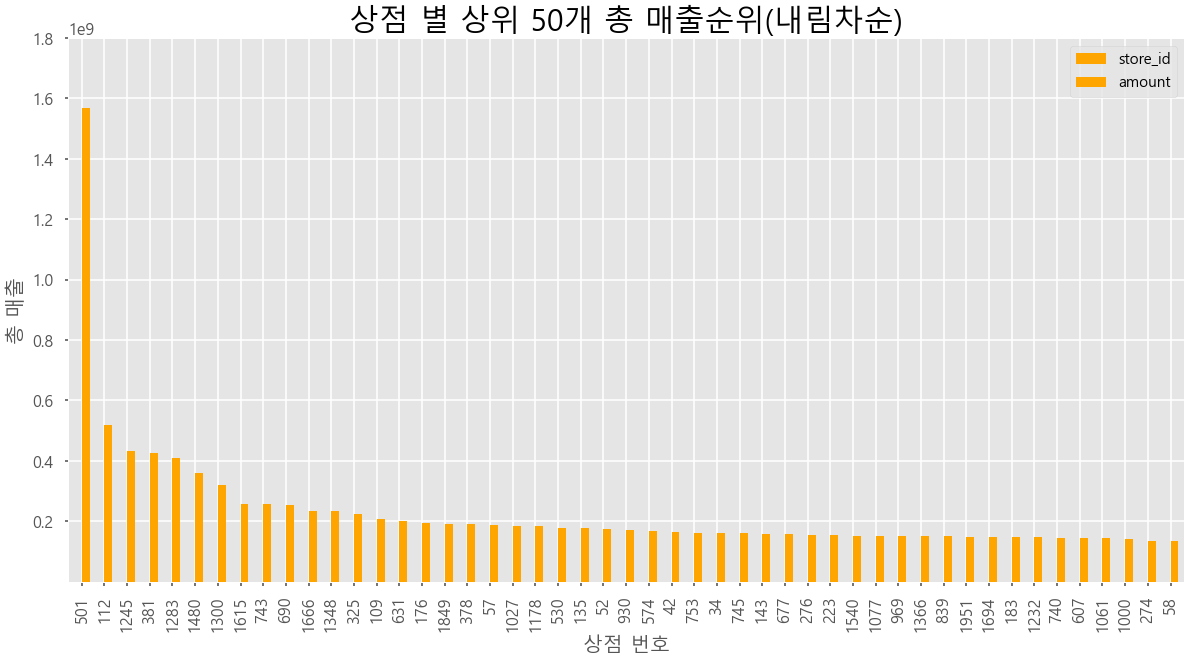

In [79]:
# 상점별 상위50 내림차순 막대그래프 시각화

#스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
dfTop50.index = dfTop50.index.map(int)

# 막대 그래프 그리기

dfTop50.plot(kind='bar', figsize=(20,10), width=0.7,
          color=['orange'])

plt.title('상점 별 상위 50개 총 매출순위(내림차순)', size=30)
plt.ylabel('총 매출',size=20 )
plt.xlabel('상점 번호',size=20)

plt.ylim(5000, 1800000000)
plt.legend(loc='best', fontsize=15 )

plt.show()


In [71]:
# 상점별 하위 50개 총 매출 시각화

dfSort2 = df0_1.sort_values(by=['amount'], axis=0)
dfSort2


,store_id,amount
742,795,5.063271e+05
1322,1432,1.009622e+06
1793,1948,1.016600e+06
1326,1436,1.127101e+06
1151,1240,1.226900e+06
...,...,...
1283,1388,4.106306e+08
381,410,4.252075e+08
1245,1348,4.323834e+08
112,119,5.183212e+08


In [72]:
# 히위 50개 자르기
dfbottom50 = dfSort2.iloc[:49]
dfbottom50

,store_id,amount
742,795,5.063271e+05
1322,1432,1.009622e+06
1793,1948,1.016600e+06
1326,1436,1.127101e+06
1151,1240,1.226900e+06
383,412,1.230595e+06
755,808,1.635599e+06
1922,2091,1.658629e+06
410,443,1.679607e+06
590,632,1.887714e+06


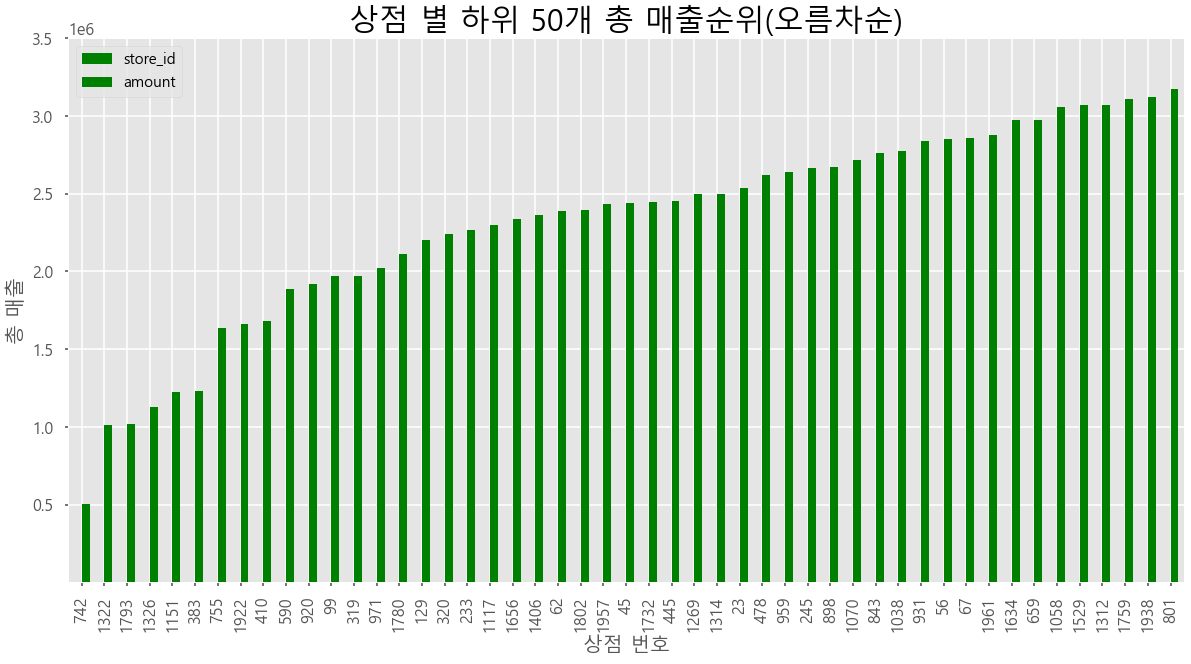

In [77]:
# 상점별 하위 50 오름차순 막대그래프 시각화

#스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
dfbottom50.index = dfbottom50.index.map(int)

# 막대 그래프 그리기

dfbottom50.plot(kind='bar', figsize=(20,10), width=0.7,
          color=['green'])

plt.title('상점 별 하위 50개 총 매출순위(오름차순)', size=30)
plt.ylabel('총 매출',size=20 )
plt.xlabel('상점 번호',size=20)

plt.ylim(5000, 3500000)
plt.legend(loc='best', fontsize=15 )

plt.show()

In [17]:
#그룹바이
# 상점별, 카드회사별 매출집계, card_id, card_company, transacted_date, transacted_time, installment_term, region, type_of_business, amount
df1 = df0.groupby(['store_id', 'card_company'])['amount'].sum()
df1

store_id  card_company
0         a               7.612571e+06
          b               5.550071e+06
          c               4.716829e+06
          e               1.626571e+06
          f               1.366000e+06
                              ...     
2136      d               1.663301e+07
          e               2.868786e+06
          f               3.433571e+06
          g               1.516143e+06
          h               6.401429e+05
Name: amount, Length: 15468, dtype: float64

In [19]:
df1=df1.reset_index()

In [20]:
df1

,store_id,card_company,amount
0,0,a,7.612571e+06
1,0,b,5.550071e+06
2,0,c,4.716829e+06
3,0,e,1.626571e+06
4,0,f,1.366000e+06
...,...,...,...
15463,2136,d,1.663301e+07
15464,2136,e,2.868786e+06
15465,2136,f,3.433571e+06
15466,2136,g,1.516143e+06


In [ ]:
# 상점별 인덱스 
df1.index = df1['store_id']
df1.set_index('store_id', inplace=True)

In [ ]:
df1

In [ ]:
# 상점별 총 매출 시각화

df1.plot()
plt.show()


In [21]:
df1_1 = df1.pivot('store_id','card_company','amount')
df1_1

card_company,a,b,c,d,e,f,g,h
store_id,,,,,,,,
0,7.612571e+06,5.550071e+06,4.716829e+06,NaN,1.626571e+06,1.366000e+06,1.936286e+06,1.366143e+06
1,1.243286e+06,8.707143e+05,8.215714e+05,NaN,1.624286e+05,2.459286e+05,2.408571e+05,8.385714e+04
2,2.818714e+06,1.636857e+06,1.759714e+06,NaN,5.814286e+05,1.335571e+06,6.071429e+05,1.035714e+05
4,7.951957e+06,6.286607e+06,6.508314e+06,1.313936e+06,2.245950e+06,2.063793e+06,2.763257e+06,7.671429e+05
5,2.236829e+06,2.088157e+06,2.148543e+06,1.011386e+06,1.651714e+06,9.716429e+05,4.838571e+05,2.695143e+05
...,...,...,...,...,...,...,...,...
2132,6.858686e+06,4.096214e+06,5.000643e+06,1.120214e+06,1.297000e+06,1.851500e+06,1.949000e+06,4.606429e+05
2133,2.329443e+06,2.502329e+06,1.919786e+06,7.439429e+05,1.430371e+06,1.221143e+06,4.773286e+05,4.158143e+05
2134,2.107071e+06,1.160214e+06,9.319286e+05,2.111071e+06,6.781429e+05,7.220714e+05,3.522857e+05,8.471429e+04


In [22]:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2136
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       1964 non-null   float64
 1   b       1963 non-null   float64
 2   c       1964 non-null   float64
 3   d       1770 non-null   float64
 4   e       1949 non-null   float64
 5   f       1949 non-null   float64
 6   g       1963 non-null   float64
 7   h       1946 non-null   float64
dtypes: float64(8)
memory usage: 138.3 KB


In [23]:
# b,d,e,f,g,h결측치 0으로 메우기
df1_1 = df1_1.fillna(0)
df1_1

card_company,a,b,c,d,e,f,g,h
store_id,,,,,,,,
0,7.612571e+06,5.550071e+06,4.716829e+06,0.000000e+00,1.626571e+06,1.366000e+06,1.936286e+06,1.366143e+06
1,1.243286e+06,8.707143e+05,8.215714e+05,0.000000e+00,1.624286e+05,2.459286e+05,2.408571e+05,8.385714e+04
2,2.818714e+06,1.636857e+06,1.759714e+06,0.000000e+00,5.814286e+05,1.335571e+06,6.071429e+05,1.035714e+05
4,7.951957e+06,6.286607e+06,6.508314e+06,1.313936e+06,2.245950e+06,2.063793e+06,2.763257e+06,7.671429e+05
5,2.236829e+06,2.088157e+06,2.148543e+06,1.011386e+06,1.651714e+06,9.716429e+05,4.838571e+05,2.695143e+05
...,...,...,...,...,...,...,...,...
2132,6.858686e+06,4.096214e+06,5.000643e+06,1.120214e+06,1.297000e+06,1.851500e+06,1.949000e+06,4.606429e+05
2133,2.329443e+06,2.502329e+06,1.919786e+06,7.439429e+05,1.430371e+06,1.221143e+06,4.773286e+05,4.158143e+05
2134,2.107071e+06,1.160214e+06,9.319286e+05,2.111071e+06,6.781429e+05,7.220714e+05,3.522857e+05,8.471429e+04


In [24]:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2136
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       1967 non-null   float64
 1   b       1967 non-null   float64
 2   c       1967 non-null   float64
 3   d       1967 non-null   float64
 4   e       1967 non-null   float64
 5   f       1967 non-null   float64
 6   g       1967 non-null   float64
 7   h       1967 non-null   float64
dtypes: float64(8)
memory usage: 138.3 KB


In [25]:
df1_1['a']

store_id
0       7.612571e+06
1       1.243286e+06
2       2.818714e+06
4       7.951957e+06
5       2.236829e+06
            ...     
2132    6.858686e+06
2133    2.329443e+06
2134    2.107071e+06
2135    7.476286e+06
2136    1.337443e+07
Name: a, Length: 1967, dtype: float64

In [84]:
# a,b,c,d,e,f,g 카드회사 기준 매출순위 많은 상점 별 내림차순 정리
df1_1Sort = df1_1.sort_values(by=['a','b','c','d','e','f','g'], axis=0, ascending=False)
df1_1Sort

card_company,a,b,c,d,e,f,g,h
store_id,,,,,,,,
538,4.542472e+08,2.157272e+08,4.149227e+08,2.155058e+07,1.745392e+08,5.002352e+07,2.256929e+08,1.183687e+07
410,1.781840e+08,5.559257e+07,5.141529e+07,2.129100e+07,3.725637e+07,2.548814e+07,4.751726e+07,8.462857e+06
1388,1.466222e+08,6.060811e+07,6.120388e+07,9.833057e+06,3.433963e+07,4.053314e+07,4.549983e+07,1.199069e+07
119,1.023371e+08,9.383636e+07,9.135754e+07,2.498700e+07,7.377343e+07,6.116500e+07,3.116179e+07,3.970300e+07
1348,9.583371e+07,4.727857e+07,4.525871e+07,4.648171e+07,7.827971e+07,4.331543e+07,2.173286e+07,5.420271e+07
...,...,...,...,...,...,...,...,...
594,1.159143e+05,8.111429e+04,1.484429e+05,5.138571e+04,5.887140e+06,1.153000e+05,1.553143e+05,5.342857e+03
795,7.368857e+04,4.607143e+04,1.182000e+05,6.550000e+04,5.057143e+04,4.524286e+04,7.341000e+04,3.364286e+04
1285,0.000000e+00,8.090357e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [97]:
# 상위 10개
df1_1Top = df1_1Sort[:9]
df1_1Top

card_company,a,b,c,d,e,f,g,h
store_id,,,,,,,,
538,4.542472e+08,2.157272e+08,4.149227e+08,2.155058e+07,1.745392e+08,5.002352e+07,2.256929e+08,1.183687e+07
410,1.781840e+08,5.559257e+07,5.141529e+07,2.129100e+07,3.725637e+07,2.548814e+07,4.751726e+07,8.462857e+06
1388,1.466222e+08,6.060811e+07,6.120388e+07,9.833057e+06,3.433963e+07,4.053314e+07,4.549983e+07,1.199069e+07
119,1.023371e+08,9.383636e+07,9.135754e+07,2.498700e+07,7.377343e+07,6.116500e+07,3.116179e+07,3.970300e+07
1348,9.583371e+07,4.727857e+07,4.525871e+07,4.648171e+07,7.827971e+07,4.331543e+07,2.173286e+07,5.420271e+07
1408,9.520864e+07,4.700886e+07,8.389286e+06,1.085171e+07,6.682900e+07,2.329071e+07,4.647514e+07,2.089543e+07
1754,7.472263e+07,3.973693e+07,3.226043e+07,0.000000e+00,4.882294e+07,2.001629e+07,2.146514e+07,1.993193e+07
796,6.359436e+07,3.735579e+07,4.261744e+07,3.305319e+07,2.901319e+07,2.917647e+07,1.317273e+07,7.608700e+06
1269,5.926286e+07,2.966200e+07,1.930614e+07,2.523914e+07,9.983429e+06,2.257986e+07,8.896000e+06,7.602286e+06


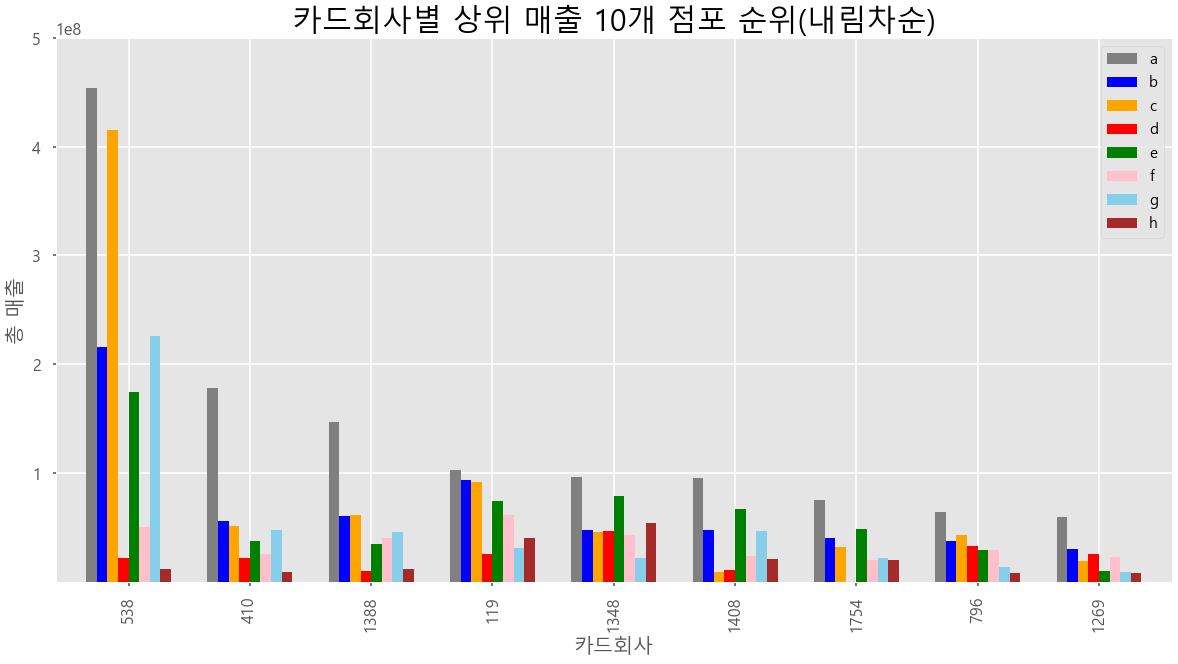

In [101]:
# 카드회사별 막대그래프

#스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df1_1Top.index = df1_1Top.index.map(int)

# 막대 그래프 그리기

df1_1Top.plot(kind='bar', figsize=(20,10), width=0.7,
          color=['grey','blue','orange','red','green','pink','skyblue','brown'])

plt.title('카드회사별 상위 매출 10개 점포 순위(내림차순)', size=30)
plt.ylabel('총 매출',size=20 )
plt.xlabel('카드회사',size=20)

plt.ylim(5000, 500000000)
plt.legend(loc='best', fontsize=15 )

plt.show()

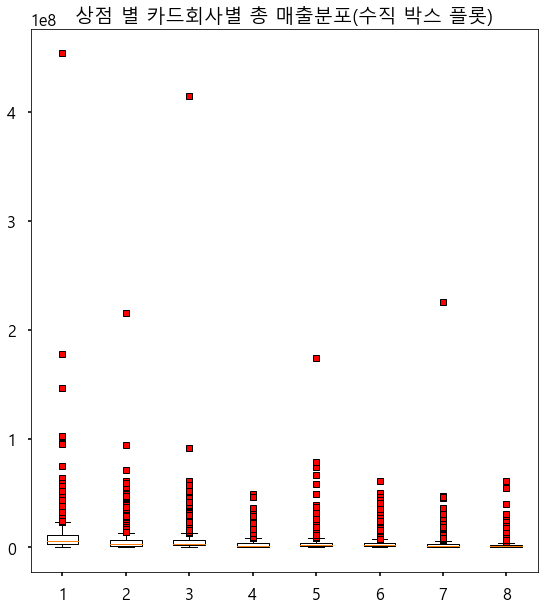

In [39]:
# 카드회사별 박스플롯

# 한글폰트 오류 해결

from matplotlib import font_manager, rc
font_path = "./malgun.ttf"#폰트파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('seaborn-poster')#스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 출력 지정

# 그래프 객체 생성
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)

# axe 객체에 boxplot 메소드로 그래프 출력 
data = df1_1

green_diamond = dict(markerfacecolor='r', marker='s')
plt.boxplot(data, flierprops=green_diamond)

ax1.set_title('상점 별 카드회사별 총 매출분포(수직 박스 플롯)')
plt.show()

## a(=1)회사가 이상치제일 많고 중앙값 최대값 총 매출에 가장 많이 기여한다 이상치는 스케일러가 필요하다 ##

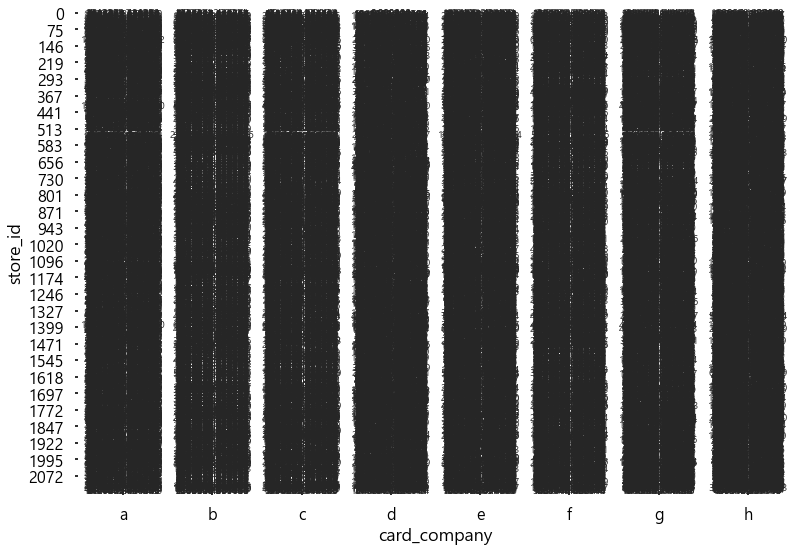

In [27]:
# 카드회사별 히트맵

sns.heatmap(df1_1,#데이터프레임
           annot=True, fmt='f',#데이터값 표시 여부, 실수형 포맷
           cmap='YlGnBu', #컬러맵
            linewidth=.5,#구분선
            cbar=False)#컬러 바 표시 여부
           
plt.show()
#상점이 너무 많아서 heatmap이 빽빽하게 그려짐

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

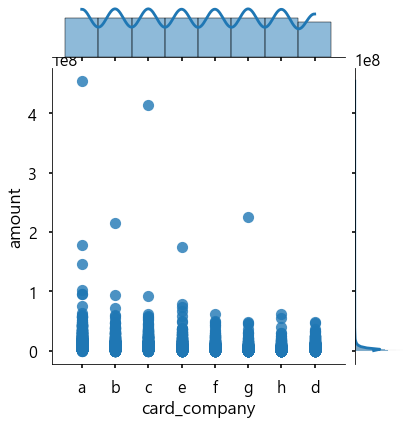

In [28]:
# 카드회사 변수는 상점에 따라 매출에 영향을 미치는가??

# 산점도+히스토그램

sns.jointplot(x='card_company', y='amount', kind='reg',data=df1)#회귀선표시
plt.show()
plt.close()


In [29]:
# 그룹바이
# 상점별 installment_term 할부개월수 별 amount

df2= df0.groupby(['store_id', 'installment_term'])['amount'].sum()
df2

store_id  installment_term
0         0                   2.163076e+07
          2                   1.123857e+06
          3                   1.204000e+06
          4                   7.714286e+04
          5                   4.142857e+04
                                  ...     
2135      0                   1.811407e+07
          2                   3.314286e+04
2136      0                   5.079504e+07
          2                   2.542857e+04
          3                   7.985714e+04
Name: amount, Length: 10924, dtype: float64

In [30]:
df2=df2.reset_index()

In [31]:
df2

,store_id,installment_term,amount
0,0,0,2.163076e+07
1,0,2,1.123857e+06
2,0,3,1.204000e+06
3,0,4,7.714286e+04
4,0,5,4.142857e+04
...,...,...,...
10919,2135,0,1.811407e+07
10920,2135,2,3.314286e+04
10921,2136,0,5.079504e+07
10922,2136,2,2.542857e+04


In [32]:
df2_1 = df2.pivot('store_id','installment_term','amount')
df2_1

installment_term,0,2,3,4,5,6,7,...,63,65,72,80,82,83,93
store_id,,,,,,,,,,,,,,,
0,2.163076e+07,1.123857e+06,1.204000e+06,77142.857143,4.142857e+04,75714.285714,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.668643e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.511143e+06,4.525714e+05,7.735714e+05,NaN,1.857143e+04,87142.857143,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.984553e+07,2.271429e+04,3.214286e+04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8.773071e+06,7.710000e+05,1.125143e+06,92714.285714,7.057143e+04,29142.857143,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,2.226747e+07,2.285714e+04,3.435714e+05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2133,7.258614e+06,2.794286e+05,1.009286e+06,142857.142857,1.088714e+06,407571.428571,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2134,8.026786e+06,8.714286e+03,3.485714e+04,NaN,7.714286e+04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# 결측치 0으로 메우기
df2_1 = df2_1.fillna(0)
df2_1

installment_term,0,2,3,4,5,6,7,...,63,65,72,80,82,83,93
store_id,,,,,,,,,,,,,,,
0,2.163076e+07,1.123857e+06,1.204000e+06,77142.857143,4.142857e+04,75714.285714,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.668643e+06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.511143e+06,4.525714e+05,7.735714e+05,0.000000,1.857143e+04,87142.857143,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.984553e+07,2.271429e+04,3.214286e+04,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,8.773071e+06,7.710000e+05,1.125143e+06,92714.285714,7.057143e+04,29142.857143,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,2.226747e+07,2.285714e+04,3.435714e+05,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2133,7.258614e+06,2.794286e+05,1.009286e+06,142857.142857,1.088714e+06,407571.428571,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2134,8.026786e+06,8.714286e+03,3.485714e+04,0.000000,7.714286e+04,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


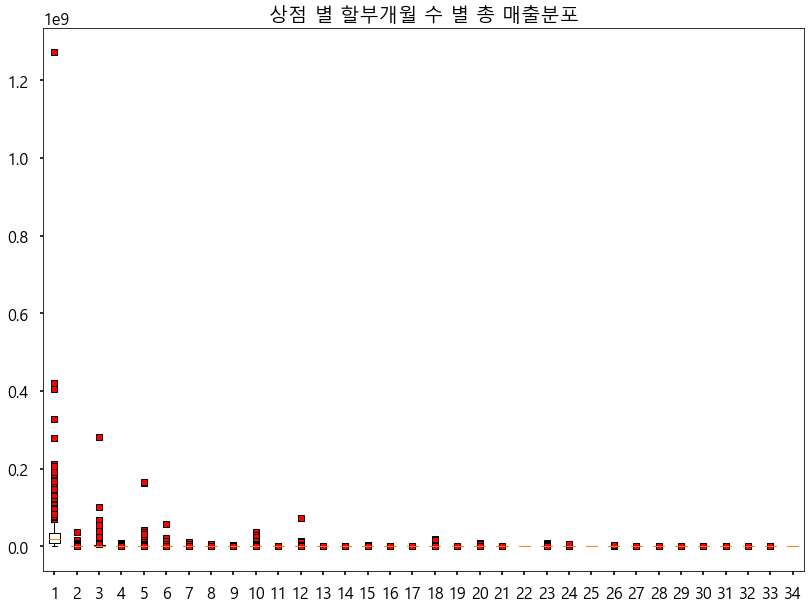

In [38]:
# 할부개월수 별 박스플롯

# 한글폰트 오류 해결

from matplotlib import font_manager, rc
font_path = "./malgun.ttf"#폰트파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('seaborn-poster')#스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 출력 지정

# 그래프 객체 생성
fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(1, 2, 1)

# axe 객체에 boxplot 메소드로 그래프 출력 
data = df2_1

green_diamond = dict(markerfacecolor='r', marker='s')
plt.boxplot(data, flierprops=green_diamond)

ax1.set_title('상점 별 할부개월 수 별 총 매출분포')
plt.show()

## 할부개월 수가 적을 수록 총매출이 크며 이상치도 제일 크다 (1,3,5,6,10, 12달 이상치 스케일러가 필요##

## 할부개월수&총 매출 회귀분석 ##

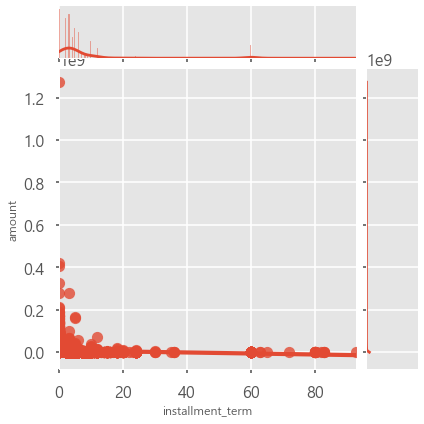

In [160]:
# 산점도+히스토그램

sns.jointplot(x='installment_term', y='amount', kind='reg',data=df2)#회귀선표시
plt.show()
plt.close()

In [124]:
# 그룹바이
# 상점별 지역별 총매출,  region  amount

df3 = df0.groupby(['region'])['amount'].sum()
df3

region
0         1.936992e+10
강원 강릉시    2.343820e+08
강원 삼척시    6.896129e+07
강원 속초시    2.961477e+08
강원 양구군    3.075680e+07
              ...     
충북 제천시    1.534382e+08
충북 증평군    4.346315e+07
충북 진천군    3.545923e+07
충북 청주시    9.396727e+08
충북 충주시    3.534095e+08
Name: amount, Length: 181, dtype: float64

In [125]:
df3=df3.reset_index()

In [126]:
df3

,region,amount
0,0,1.936992e+10
1,강원 강릉시,2.343820e+08
2,강원 삼척시,6.896129e+07
3,강원 속초시,2.961477e+08
4,강원 양구군,3.075680e+07
...,...,...
176,충북 제천시,1.534382e+08
177,충북 증평군,4.346315e+07
178,충북 진천군,3.545923e+07
179,충북 청주시,9.396727e+08


In [127]:
# 특정 열값 기준으로 행삭제하기
df3.drop(df3.loc[df3['region']==0].index, inplace=True)

In [129]:
# 지역별 인덱스 
df3.index = df3['region']
df3.set_index('region', inplace=True)

In [130]:
# 지역별 매출이 가장 많은 내림차순
df3Sort = df3.sort_values(by=['amount'], axis=0, ascending=False)
df3Sort
# 문자열과 숫자 섞여 있으면 오류->0 값 삭제하기

,amount
region,
서울 강남구,2.164762e+09
서울 광진구,1.905546e+09
경기 수원시,1.382518e+09
경기 용인시,1.118154e+09
서울 마포구,1.071436e+09
...,...
경북 칠곡군,1.068006e+07
경북 안동시,1.051727e+07
충남 예산군,8.147500e+06


In [139]:
# 지역별 상위 10순위
df3Sort2 = df3Sort.iloc[:9]

In [144]:
df3Sort.tail()

,amount
region,
경북 칠곡군,1.068006e+07
경북 안동시,1.051727e+07
충남 예산군,8.147500e+06
세종 도움3로,8.090357e+06
경남 거창군,5.423000e+06


In [154]:
# 지역별 하위 10순위
df3Sort3 = df3Sort.iloc[-10:]
df3Sort3

,amount
region,
경남 함안군,1.861686e+07
전북 남원시,1.573779e+07
경북 영천시,1.202041e+07
경북 울진군,1.191007e+07
강원 철원군,1.123496e+07
경북 칠곡군,1.068006e+07
경북 안동시,1.051727e+07
충남 예산군,8.147500e+06
세종 도움3로,8.090357e+06


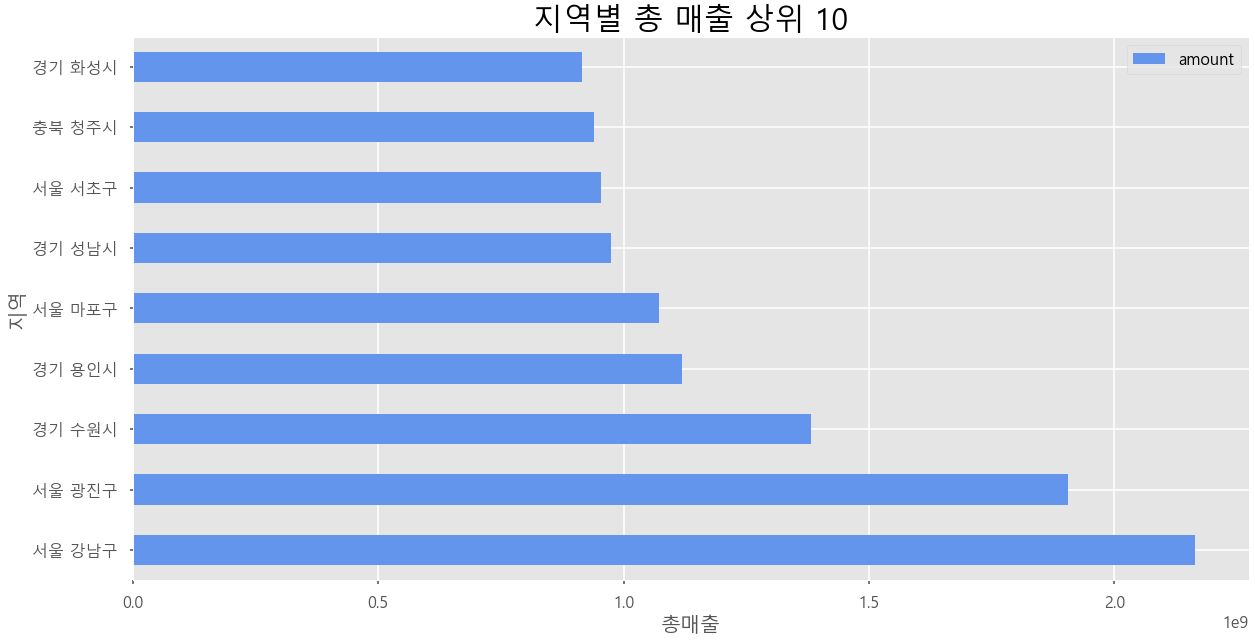

In [140]:
#가로 막대그래프 시각화

#스타일 서식 지정
plt.style.use('ggplot')

# 수평 막대 그리기

df3Sort2.plot(kind='barh', figsize=(20,10), width=0.5,
          color='cornflowerblue')

plt.title('지역별 총 매출 상위 10', size=30)
plt.ylabel('지역',size=20 )
plt.xlabel('총매출',size=20)

plt.show()

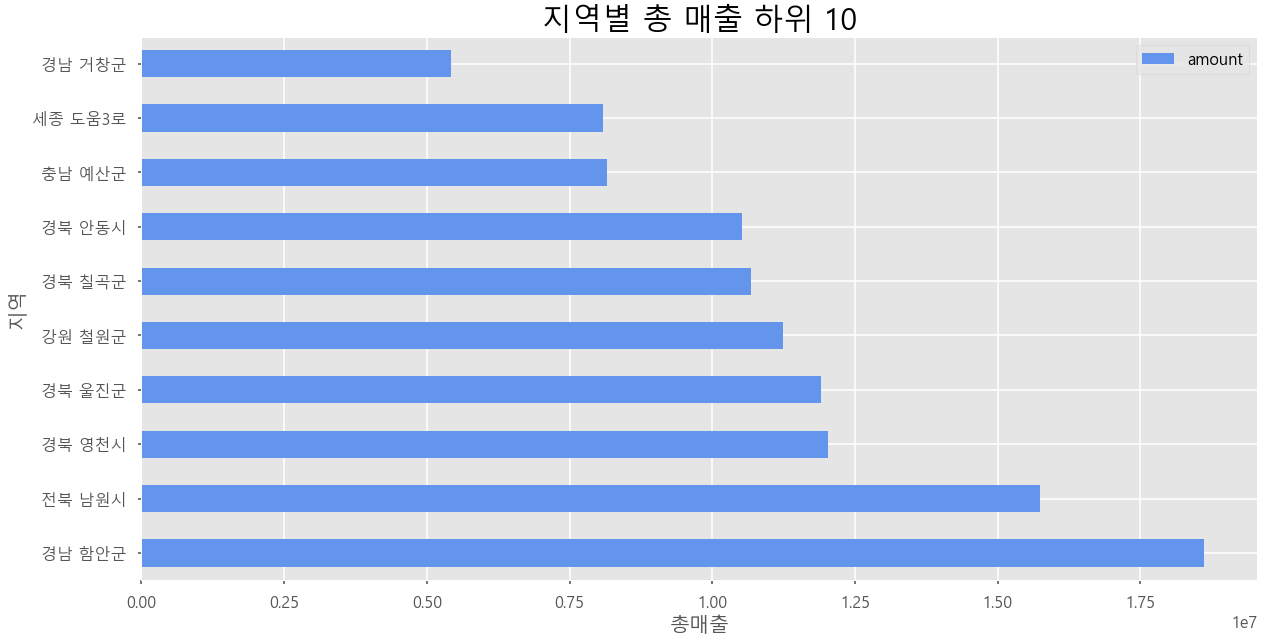

In [156]:
#가로 막대그래프 시각화

#스타일 서식 지정
plt.style.use('ggplot')

# 수평 막대 그리기

df3Sort3.plot(kind='barh', figsize=(20,10), width=0.5,
          color='cornflowerblue')

plt.title('지역별 총 매출 하위 10', size=30)
plt.ylabel('지역',size=20 )
plt.xlabel('총매출',size=20)

plt.show()

## 지역&총매출 회귀분석 ##

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

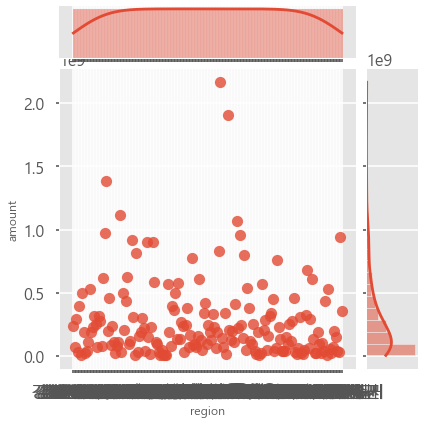

In [163]:
# 산점도+히스토그램

sns.jointplot(x='region', y='amount', kind='reg',data=df3)#회귀선표시
plt.show()
plt.close()

In [165]:
#그룹바이
#업종별 총매출 

df4 = df0.groupby(['type_of_business'])['amount'].sum()
df4

type_of_business
0                    3.948875e+10
가구 소매업               2.228384e+08
가전제품 소매업             2.151943e+08
가정용 세탁업              5.915388e+07
가정용 직물제품 소매업         9.278691e+07
                         ...     
한의원                  2.135252e+07
화장품 및 화장용품 도매업       3.711348e+08
화장품, 비누 및 방향제 소매업    4.286110e+08
화초 및 식물 소매업          1.282732e+08
화훼류 및 식물 도매업         2.903707e+07
Name: amount, Length: 146, dtype: float64

In [166]:
df4=df4.reset_index()

In [167]:
df4

,type_of_business,amount
0,0,3.948875e+10
1,가구 소매업,2.228384e+08
2,가전제품 소매업,2.151943e+08
3,가정용 세탁업,5.915388e+07
4,가정용 직물제품 소매업,9.278691e+07
...,...,...
141,한의원,2.135252e+07
142,화장품 및 화장용품 도매업,3.711348e+08
143,"화장품, 비누 및 방향제 소매업",4.286110e+08
144,화초 및 식물 소매업,1.282732e+08


In [169]:
# 특정 열값 기준으로 행삭제하기
df4.drop(df4.loc[df4['type_of_business']==0].index, inplace=True)

In [170]:
# 지역별 인덱스 
df4.index = df4['type_of_business']
df4.set_index('type_of_business', inplace=True)

In [171]:
# 지역별 매출이 가장 많은 내림차순
df4Sort = df4.sort_values(by=['amount'], axis=0, ascending=False)
df4Sort
# 문자열과 숫자 섞여 있으면 오류->0 값 삭제하기

,amount
type_of_business,
한식 음식점업,4.810450e+09
의복 소매업,2.403674e+09
의약품 도매업,1.568540e+09
일반 교과 학원,1.293611e+09
두발 미용업,1.087475e+09
...,...
예술품 및 골동품 소매업,3.172929e+06
"채소, 과실 및 뿌리작물 소매업",2.532857e+06
곡물 및 기타 식량작물 재배업,1.972814e+06


In [173]:
# 지역별 상위 10순위
df4Sort2 = df4Sort.iloc[:9]

In [175]:
# 지역별 하위 10순위
df4Sort3 = df4Sort.iloc[-10:]
df4Sort3

,amount
type_of_business,
"문구용품, 회화용품, 사무용품·· 도매업",6.033071e+06
그 외 기타 나무제품 제조업,4.462571e+06
기록매체 복제업,4.330941e+06
일반 의원,4.106983e+06
체인화 편의점,3.871520e+06
예술품 및 골동품 소매업,3.172929e+06
"채소, 과실 및 뿌리작물 소매업",2.532857e+06
곡물 및 기타 식량작물 재배업,1.972814e+06
배전반 및 전기 자동제어반 제조업,1.635599e+06


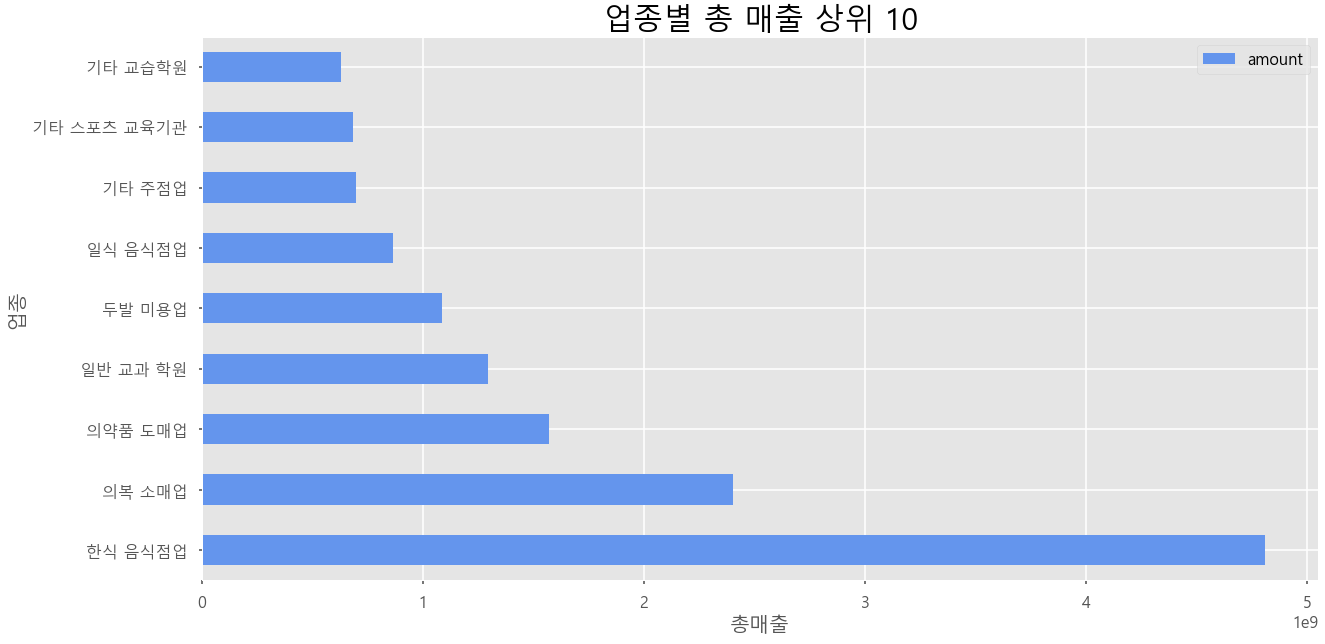

In [174]:
#가로 막대그래프 시각화

#스타일 서식 지정
plt.style.use('ggplot')

# 수평 막대 그리기

df4Sort2.plot(kind='barh', figsize=(20,10), width=0.5,
          color='cornflowerblue')

plt.title('업종별 총 매출 상위 10', size=30)
plt.ylabel('업종',size=20 )
plt.xlabel('총매출',size=20)

plt.show()

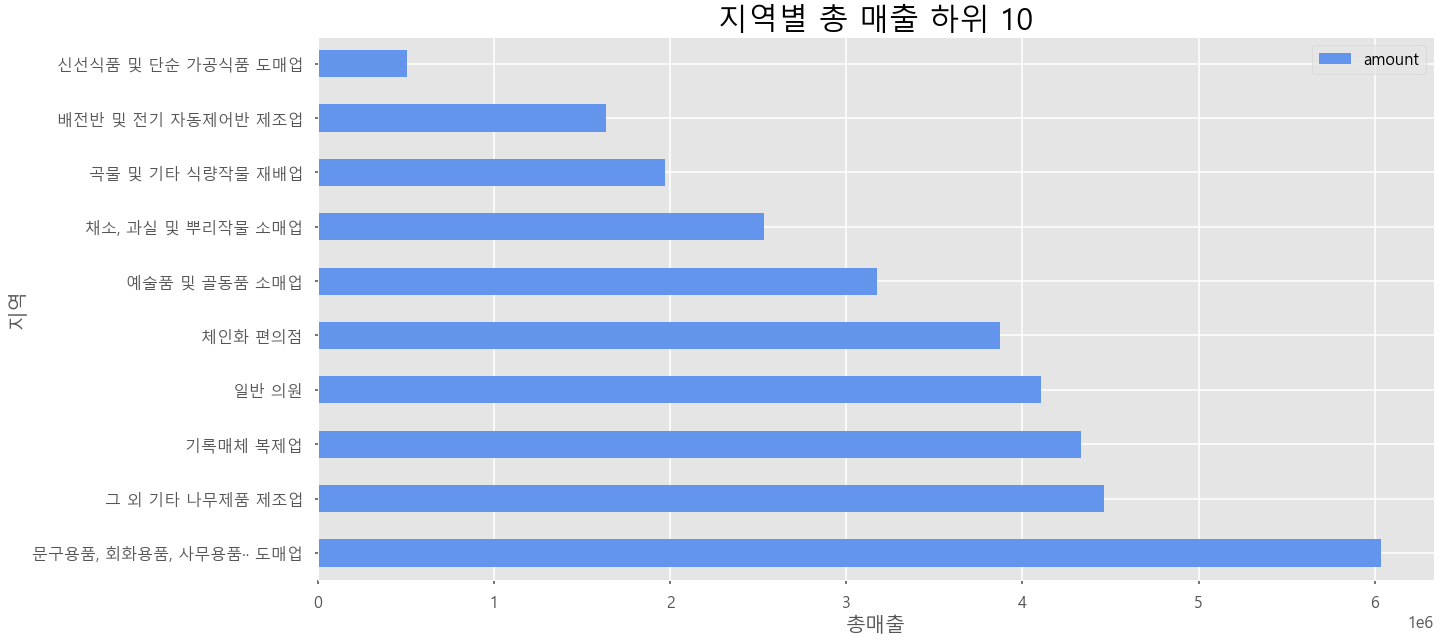

In [176]:
#가로 막대그래프 시각화

#스타일 서식 지정
plt.style.use('ggplot')

# 수평 막대 그리기

df4Sort3.plot(kind='barh', figsize=(20,10), width=0.5,
          color='cornflowerblue')

plt.title('지역별 총 매출 하위 10', size=30)
plt.ylabel('지역',size=20 )
plt.xlabel('총매출',size=20)

plt.show()

## 업종&총매출 회귀분석##

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

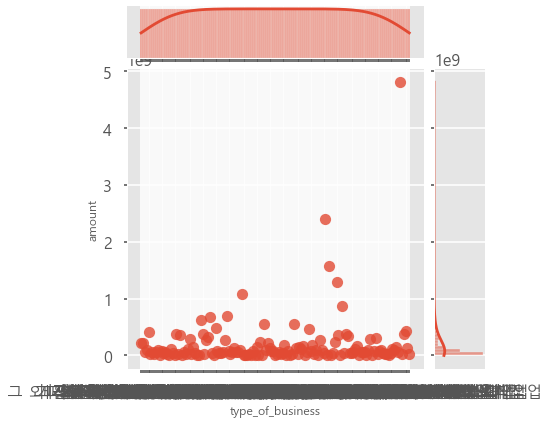

In [178]:
# 산점도+히스토그램

sns.jointplot(x='type_of_business', y='amount', kind='reg',data=df4)#회귀선표시
plt.show()
plt.close()

## 시계열 분석(거래일자, 거래시간) ##

In [15]:
# transacted_date, transacted_time 데이터 타입 string으로 인식하여 datetime64로 변환(column.dt.시간단위를 통해서 원하는 시간 부분을 추출해서 활용할 수 있음)
df0['transacted_date'] = pd.to_datetime(df0['transacted_date'])
df0['transacted_time'] = pd.to_datetime(df0['transacted_time'])

In [16]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   store_id          int64         
 1   card_id           int64         
 2   card_company      object        
 3   transacted_date   datetime64[ns]
 4   transacted_time   datetime64[ns]
 5   installment_term  int64         
 6   region            object        
 7   type_of_business  object        
 8   amount            float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 450.2+ MB


In [17]:
from datetime import *

In [18]:
#거래시간을 분->시간까지만 나타내기

df0['transacted_time'] = df0['transacted_time'].dt.hour
df0

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13,0,0,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18,0,0,기타 미용업,857.142857
2,0,2,c,2016-06-01,18,0,0,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20,0,0,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11,0,0,기타 미용업,2000.000000
...,...,...,...,...,...,...,...,...,...
6556608,2136,4663855,d,2019-02-28,23,0,제주 제주시,기타 주점업,-4500.000000
6556609,2136,4663855,d,2019-02-28,23,0,제주 제주시,기타 주점업,4142.857143
6556610,2136,4663489,a,2019-02-28,23,0,제주 제주시,기타 주점업,4500.000000
6556611,2136,4663856,d,2019-02-28,23,0,제주 제주시,기타 주점업,571.428571


In [45]:
#일자별 매출 그룹바이
daily_amount = df0.groupby(['store_id','transacted_date'])['amount'].sum()
daily_amount

store_id  transacted_date
0         2016-06-01         12571.428571
          2016-06-02         40571.428571
          2016-06-03         18142.857143
          2016-06-04         31714.285714
          2016-06-05         10428.571429
                                 ...     
2136      2019-02-24         85357.142857
          2019-02-25         37214.285714
          2019-02-26         47142.857143
          2019-02-27         65071.428571
          2019-02-28         65857.142857
Name: amount, Length: 1286113, dtype: float64

In [46]:
daily_amount = daily_amount.reset_index()

In [47]:
#인덱스를 거래일자로 재설정
daily_amount.index = daily_amount['transacted_date']
daily_amount.set_index('transacted_date', inplace=True)
daily_amount.head()

,store_id,amount
transacted_date,,
2016-06-01,0,12571.428571
2016-06-02,0,40571.428571
2016-06-03,0,18142.857143
2016-06-04,0,31714.285714
2016-06-05,0,10428.571429


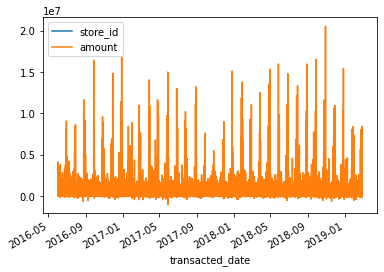

In [48]:
#일자별 매출 시각화
daily_amount.plot()
plt.show()
# stationary, seasonality한 모형이 보임


In [ ]:
# 고민인 점
# 중요한 것은 2019-03-01부터 2019-05-31까지의 각 상점별 3개월 총 매출을 예측하는 것
# 각 상점별로 변수들을 묶은 뒤 amount와 선형관계(거래일자, 거래시간은 시계열로 다르게 분석)를 파악하고 유의한 요인을 찾기
# 각 요일 별 적합한 모델을 찾아서 예측 실시
# card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business